In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
#load data
filepath_train = '../input/house-prices-advanced-regression-techniques/train.csv'
filepath_test = '../input/house-prices-advanced-regression-techniques/test.csv'
data_train = pd.read_csv(filepath_train)
data_test = pd.read_csv(filepath_test)

In [3]:
#Take a first look at the data
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Check columns' names and data type of each column
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#check the amount of missing values
missing_count = data_test.isnull().sum()
print(missing_count)
total_missing = missing_count.sum()
print("total_missing", total_missing)
total_cell = np.product(data_test.shape)
print("total_cell", total_cell)
percent_missing = (total_missing / total_cell) * 100
print("percent_missing", percent_missing)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64
total_missing 7000
total_cell 116720
percent_missing 5.9972583961617545


In [6]:
#Separate target value and index
from sklearn.model_selection import train_test_split
y_train = data_train.SalePrice
train_ID = data_train.Id
X_train = data_train.drop(['SalePrice', 'Id'], axis=1)
test_ID = data_test.Id
X_test = data_test.drop(['Id'], axis=1)

<AxesSubplot:>

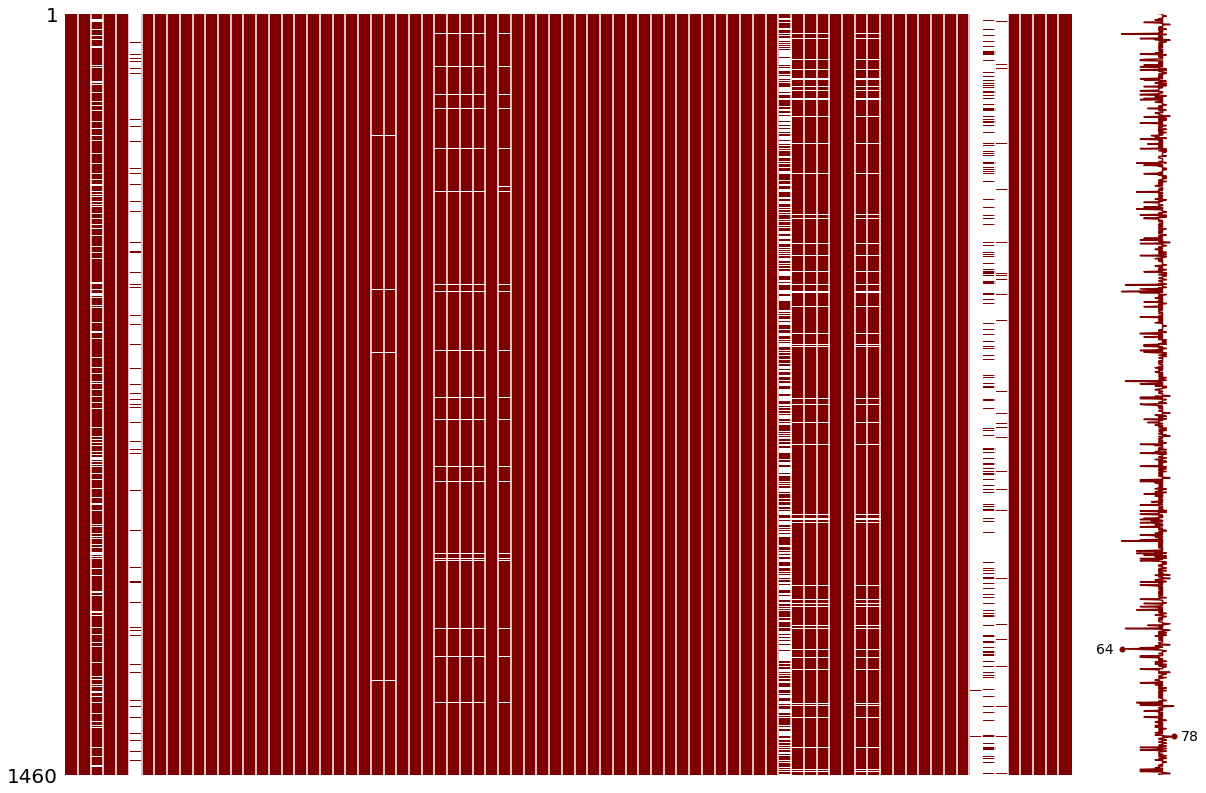

In [7]:
#vizualize the missing values
import missingno
missingno.matrix(df=X_train, figsize=(20,14), color=(0.5,0,0))

In [8]:
#Check which feature has missing values
print('training data+++++++++++++++++++++')
for i in np.arange(X_train.shape[1]):
    n = X_train.iloc[:,i].isnull().sum() 
    if n > 0:
        print(list(X_train.columns.values)[i] + ': ' + str(n) + ' nans')
print('testing data++++++++++++++++++++++ ')
for i in np.arange(X_test.shape[1]):
    n = X_test.iloc[:,i].isnull().sum() 
    if n > 0:
        print(list(X_test.columns.values)[i] + ': ' + str(n) + ' nans')

training data+++++++++++++++++++++
LotFrontage: 259 nans
Alley: 1369 nans
MasVnrType: 8 nans
MasVnrArea: 8 nans
BsmtQual: 37 nans
BsmtCond: 37 nans
BsmtExposure: 38 nans
BsmtFinType1: 37 nans
BsmtFinType2: 38 nans
Electrical: 1 nans
FireplaceQu: 690 nans
GarageType: 81 nans
GarageYrBlt: 81 nans
GarageFinish: 81 nans
GarageQual: 81 nans
GarageCond: 81 nans
PoolQC: 1453 nans
Fence: 1179 nans
MiscFeature: 1406 nans
testing data++++++++++++++++++++++ 
MSZoning: 4 nans
LotFrontage: 227 nans
Alley: 1352 nans
Utilities: 2 nans
Exterior1st: 1 nans
Exterior2nd: 1 nans
MasVnrType: 16 nans
MasVnrArea: 15 nans
BsmtQual: 44 nans
BsmtCond: 45 nans
BsmtExposure: 44 nans
BsmtFinType1: 42 nans
BsmtFinSF1: 1 nans
BsmtFinType2: 42 nans
BsmtFinSF2: 1 nans
BsmtUnfSF: 1 nans
TotalBsmtSF: 1 nans
BsmtFullBath: 2 nans
BsmtHalfBath: 2 nans
KitchenQual: 1 nans
Functional: 2 nans
FireplaceQu: 730 nans
GarageType: 76 nans
GarageYrBlt: 78 nans
GarageFinish: 78 nans
GarageCars: 1 nans
GarageArea: 1 nans
GarageQual: 

<AxesSubplot:>

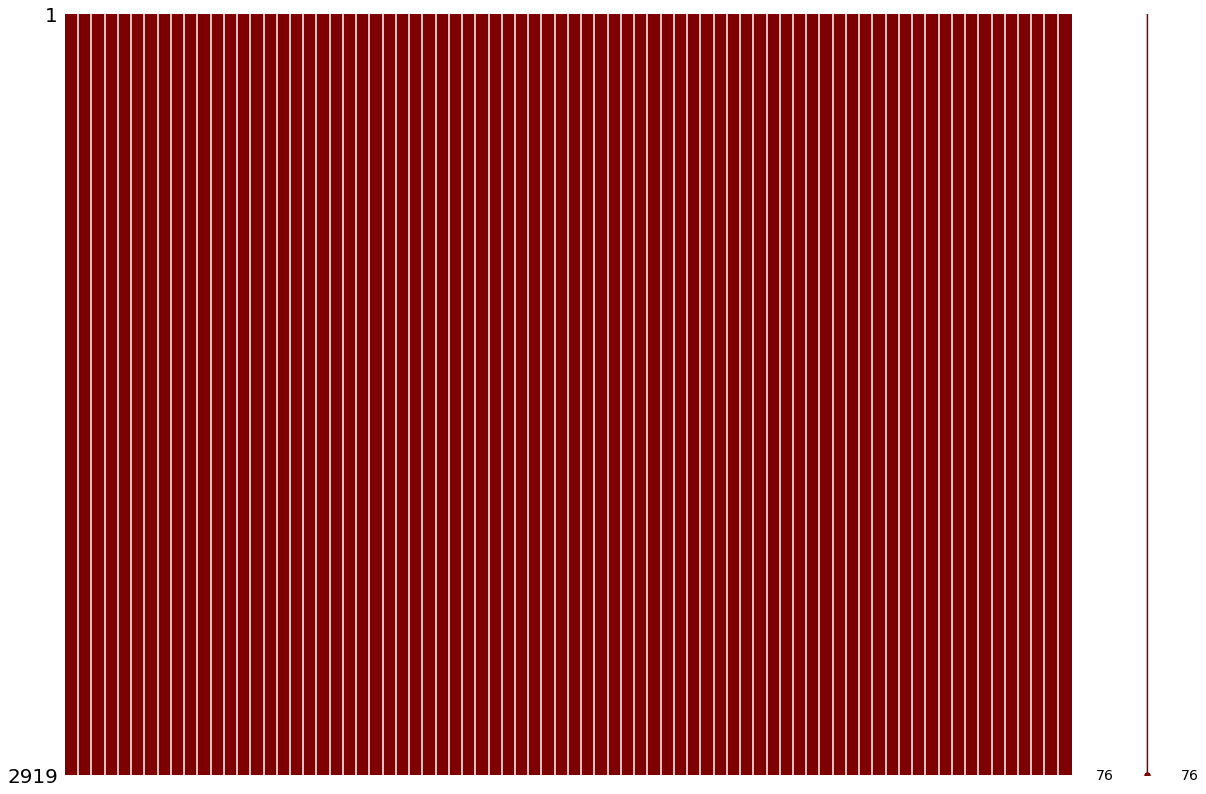

In [9]:
#Drop features have a lot of missing values 
X_mat = pd.concat([X_train, X_test])
# drop the 3 most with nan
# TODO: auto detect this...
X_mat = X_mat.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis=1)
categorical_cols = [cname for cname in X_mat.columns if X_mat[cname].dtype == "object"]
#Choose only categorical columns have less than 15 unique values
low_cardinality_cols = [cname for cname in X_mat.columns if X_mat[cname].nunique() < 15 and 
                        X_mat[cname].dtype == "object"]
numerical_cols = [cname for cname in X_mat.columns if X_mat[cname].dtype == "float" or X_mat[cname].dtype == 'int']

#Fill in missing values
from sklearn.impute import SimpleImputer
impute_num = SimpleImputer(strategy='median')
impute_cat = SimpleImputer(strategy='most_frequent')
X_mat_num = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(X_mat[numerical_cols]), columns=numerical_cols)
X_mat_cat = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(X_mat[categorical_cols]), columns=categorical_cols)
X_mat = pd.concat([X_mat_num, X_mat_cat], axis=1)
#Check if the data still has missing values
missingno.matrix(df=X_mat, figsize=(20, 14), color=(0.5,0,0))


Observing the columns, a new column can be added by summing "TotalBsmtSF", "1stFlrSF", and "2ndFlrSF" columns. 

In [10]:
#Adding new feature by combining features
X_mat['TotalSF'] = X_mat['TotalBsmtSF'] + X_mat['1stFlrSF'] + X_mat['2ndFlrSF']

In [11]:
#Separate train data and test data
X_train = X_mat.iloc[:data_train.shape[0],:]
X_test = X_mat.iloc[data_train.shape[0]:,:]

In [12]:
#preprocess categorical data
from sklearn.preprocessing import OneHotEncoder
OH = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_col_train = pd.DataFrame(OH.fit_transform(X_train[low_cardinality_cols]))
OH_col_test = pd.DataFrame(OH.transform(X_test[low_cardinality_cols]))
OH_col_train.index = X_train.index
OH_col_train.columns = OH.get_feature_names(low_cardinality_cols)
OH_col_test.index = X_test.index
OH_col_test.columns = OH.get_feature_names(low_cardinality_cols)
num_X_train = X_train.drop(categorical_cols, axis=1)
num_X_test = X_test.drop(categorical_cols, axis=1)
X_train = pd.concat([num_X_train, OH_col_train], axis=1)
X_test = pd.concat([num_X_test, OH_col_test], axis=1)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


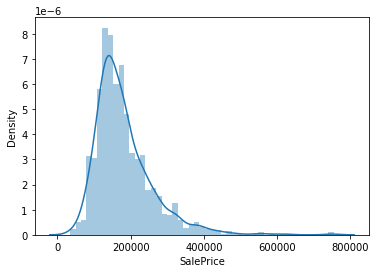

In [13]:
#Check if the target value is normally distributed
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(y_train)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


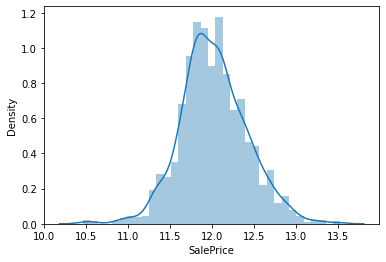

In [14]:
#Normalizing the target value by taking log
y_train = np.log(y_train)
ax = sns.distplot(y_train)
plt.show()

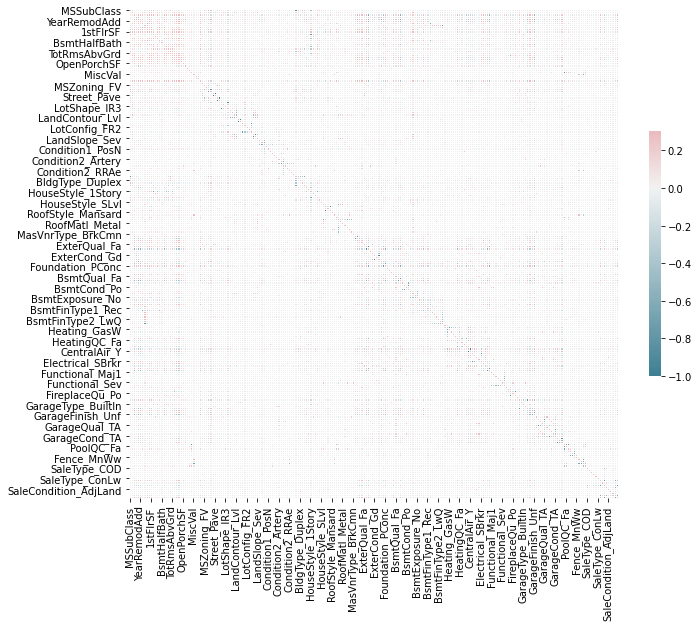

In [15]:
# Compute the correlation matrix
corr = X_train.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Training done using Random Forest


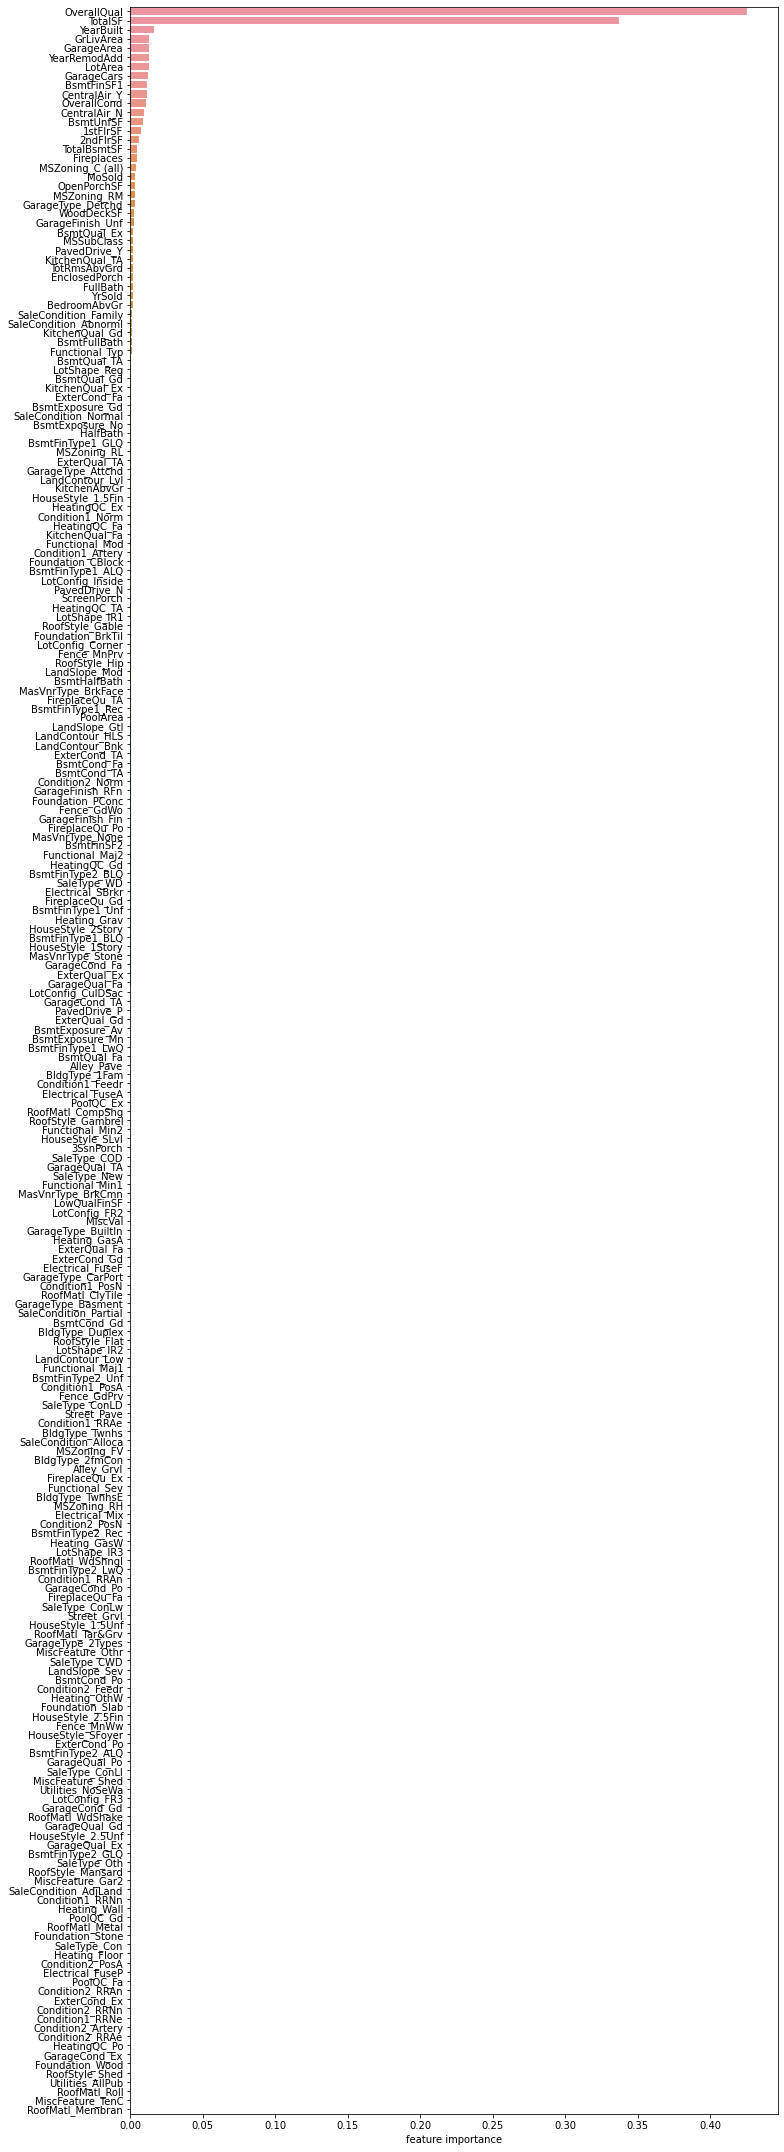

In [16]:
# feature importance using random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 30))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

Observing the above graph, there are approximately 30 features are important. 

In [17]:
# use the top 30 features only
X_train = X_train.iloc[:,ranking[:30]]
X_test = X_test.iloc[:,ranking[:30]]

In [18]:
#Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

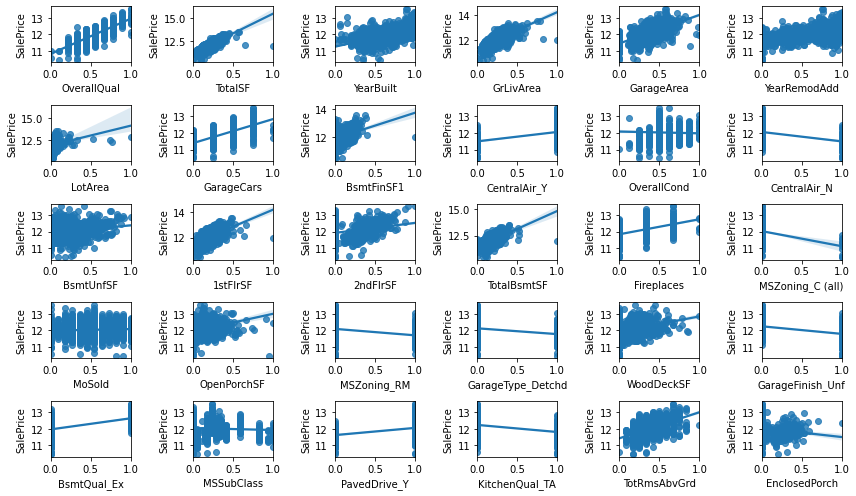

In [19]:
# relation to the target
fig = plt.figure(figsize=(12,7))
for i in np.arange(30):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

Observing 30 graphs above, it s good that there are not many outliers. 

In [20]:
# outlier deletion
Xmat = X_train
Xmat['SalePrice'] = y_train
Xmat = Xmat.drop(Xmat[(Xmat['TotalSF']>0.5) & (Xmat['SalePrice']<12.5)].index)
Xmat = Xmat.drop(Xmat[(Xmat['GrLivArea']>0.5) & (Xmat['SalePrice']<12.5)].index)
Xmat = Xmat.drop(Xmat[(Xmat['BsmtFinSF1']>0.5) & (Xmat['SalePrice']>11)].index)
Xmat = Xmat.drop(Xmat[(Xmat['1stFlrSF']>0.75) & (Xmat['SalePrice']>11)].index)
Xmat = Xmat.drop(Xmat[(Xmat['TotalBsmtSF']>0.75) & (Xmat['SalePrice']<12.5)].index)
Xmat = Xmat.drop(Xmat[(Xmat['OpenPorchSF']>0.75) & (Xmat['SalePrice']<11)].index)

# recover
y_train = Xmat['SalePrice']
X_train = Xmat.drop(['SalePrice'], axis=1)

In [21]:
#Enrich Feature by PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias=False)
X_train = pd.DataFrame(poly.fit_transform(X_train))
X_test = pd.DataFrame(poly.fit_transform(X_test))

In [22]:
# XGBoost Model
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
pipe_xgb = make_pipeline(xgb.XGBRegressor())
grid_xgb = {'xgbregressor__max_depth': [1, 2, 3, 5],'xgbregressor__n_estimators': [30, 50, 120, 200]}
reg_xgb = GridSearchCV(pipe_xgb,param_grid=grid_xgb, cv=5)
X_train_xg = np.ascontiguousarray(X_train)
y_train_xg = np.ascontiguousarray(y_train)
reg_xgb.fit(X_train_xg, y_train_xg)
print(reg_xgb.best_score_)
print(reg_xgb.best_params_)

0.8957772238682725
{'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 120}


<AxesSubplot:>

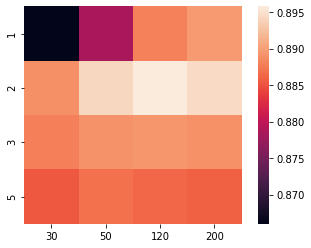

In [23]:
#Analyzing result of cv XGB model
results_xgb = pd.DataFrame(reg_xgb.cv_results_)
scores_xgb = pd.DataFrame(np.array(results_xgb.mean_test_score).reshape(4, 4))
sns.heatmap(scores_xgb,xticklabels=grid_xgb['xgbregressor__n_estimators'], yticklabels=grid_xgb['xgbregressor__max_depth'], square=True)

Above graph is good because it has good variety and the best combination is not at the edge. 

In [24]:
#Neural Network Model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

nn_model = make_pipeline(KerasRegressor(build_fn=create_model), verbose=0)
#nn_model.get_params().keys()
# define the grid search parameters
param_grid_keras = {'kerasregressor__optimizer': ['SGD'], 'kerasregressor__batch_size': [10, 30, 100, 150], 'kerasregressor__epochs': [100, 450, 500, 600]}
reg_dl = GridSearchCV(estimator=nn_model, param_grid=param_grid_keras, n_jobs=-1)
reg_dl.fit(X_train, y_train)

print(reg_dl.best_score_)
print(reg_dl.best_params_)

Epoch 1/600
15/15 [==============================] - 0s 4ms/step - loss: 103.0892
Epoch 2/600
15/15 [==============================] - 0s 3ms/step - loss: 20.2212
Epoch 3/600
15/15 [==============================] - 0s 3ms/step - loss: 10.7077
Epoch 4/600
15/15 [==============================] - 0s 3ms/step - loss: 7.3667
Epoch 5/600
15/15 [==============================] - 0s 3ms/step - loss: 3.9423
Epoch 6/600
15/15 [==============================] - 0s 3ms/step - loss: 1.8488
Epoch 7/600
15/15 [==============================] - 0s 3ms/step - loss: 0.9937
Epoch 8/600
15/15 [==============================] - 0s 3ms/step - loss: 0.8319
Epoch 9/600
15/15 [==============================] - 0s 3ms/step - loss: 0.4905
Epoch 10/600
15/15 [==============================] - 0s 3ms/step - loss: 0.4130
Epoch 11/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1698
Epoch 12/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1657
Epoch 13/600
15/15 [=============

<AxesSubplot:>

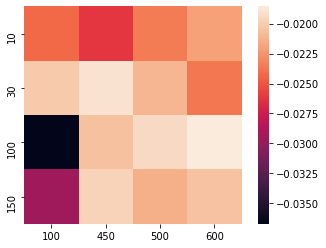

In [25]:
#Analyzing result of KerasRegressor model
results_keras = pd.DataFrame(reg_dl.cv_results_)
scores_keras = pd.DataFrame(np.array(results_keras.mean_test_score).reshape(4, 4))
sns.heatmap(scores_keras,xticklabels=param_grid_keras['kerasregressor__epochs'], yticklabels=param_grid_keras['kerasregressor__batch_size'], square=True)

Above graph is good because it has variety and the best combination is not at the edge. 

In [26]:
#SVR Model
from sklearn.svm import SVR

svr_model = make_pipeline(SVR(kernel='rbf'), verbose=0)
#print(svr_model.get_params().keys())
grid_svr = {'svr__C': [1e1, 1e2, 1e3, 1e4], 'svr__gamma': np.logspace(-5, -1, 5)}

reg_svr = GridSearchCV(svr_model, cv=5, param_grid=grid_svr, n_jobs=-1)
                               
reg_svr.fit(X_train, y_train)

print(reg_svr.best_score_)
print(reg_svr.best_params_)

0.9112785049570851
{'svr__C': 100.0, 'svr__gamma': 0.001}


<AxesSubplot:>

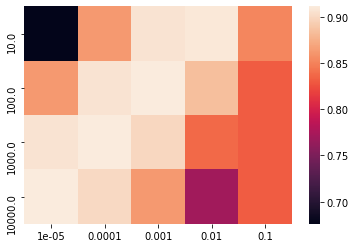

In [27]:
#Analyzing result of cv SVR Model
results_svr = pd.DataFrame(reg_svr.cv_results_)
scores_svr = pd.DataFrame(np.array(results_svr.mean_test_score).reshape(4, 5))
sns.heatmap(scores_svr, xticklabels=grid_svr['svr__gamma'], yticklabels=grid_svr['svr__C'])


Above graph is good because it has variety and the best combination is not at the edge. 

In [28]:
# second feature matrix
X_train2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_train_xg),
     'NN': reg_dl.predict(X_train).ravel(),
     'SVR': reg_svr.predict(X_train),
    })

In [29]:
# second-feature modeling using linear regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train2, y_train)

# prediction using the test set
X_test_xgb = np.ascontiguousarray(X_test)
X_test2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_test_xgb),
     'DL': reg_dl.predict(X_test).ravel(),
     'SVR': reg_svr.predict(X_test),
    })
#exponent the prediction value back after taking log of the training target value
y_pred = np.exp(reg.predict(X_test2))

In [30]:
#Create a new DataFrame for submission
submission = pd.DataFrame({"Id": test_ID,"SalePrice": y_pred})
#Submit the code file 
submission.to_csv('houseprice.csv', index=False)